In [68]:
from pandera import DataFrameSchema, Column, Check
import pandas as pd
import pandera as pa
import pandera.strategies as st
import seaborn as sns
import re 

In [69]:
# Read in data
df = pd.read_csv('audible_uncleaned.csv')
df

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [70]:
# Fix time column so it's not string and integer
extracted_data = df['time'].str.extract(r'(\d+)(?: hrs?(?: and (\d+) mins?))?').fillna(0).astype(int)

# Calculate total minutes
total_minutes = (extracted_data[0] * 60) + extracted_data[1]

# Add the 'total_minutes' column to the DataFrame
df['total_minutes'] = total_minutes

In [71]:
# Regular expression for extracting rating (floating point number at the start)
rating_extraction_regex = r'(\d+\.\d+|\d+) out of 5'
df['rating'] = df['stars'].str.extract(rating_extraction_regex).astype(float)

# Regular expression for extracting number of ratings (integer following 'stars')
number_of_ratings_extraction_regex = r'stars(\d+) ratings'
df['number_of_ratings'] = df['stars'].str.extract(number_of_ratings_extraction_regex).astype(float)

# Optionally, fill NaN values if needed
df['number_of_ratings'] = df['number_of_ratings'].fillna(0).astype(int)

# Dropping the original 'stars' column as it's no longer needed
df.drop('stars', axis=1, inplace=True)



In [72]:
df['author'] = df['author'].str.replace('Writtenby:', '')

In [73]:
df['narrator'] = df['narrator'].str.replace('Narratedby:', '')


In [74]:
df['author'] = df['author'].apply(lambda x: re.sub(r"(\w)([A-Z])", r"\1 \2", x))
df

,name,author,narrator,time,releasedate,language,price,total_minutes,rating,number_of_ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,140,5.0,34
1,The Burning Maze,Rick Riordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,788,4.5,41
2,The Deep End,Jeff Kinney,DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,123,4.5,38
3,Daughter of the Deep,Rick Riordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,676,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,JesseBernstein,10 hrs,13-01-10,English,820.00,600,4.5,181
...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,596.00,454,NaN,0
87485,The Alps,Stephen O'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,820.00,607,NaN,0
87486,The Innocents Abroad,Mark Twain,FloGibson,19 hrs and 4 mins,30-12-16,English,938.00,1144,NaN,0
87487,A Sentimental Journey,Laurence Sterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,680.00,248,NaN,0


In [75]:
df['narrator'] = df['narrator'].apply(lambda x: re.sub(r"(\w)([A-Z])", r"\1 \2", x))

In [76]:

df['price'] = df['price'].str.replace(',', '', regex=True)
df['price'] = df['price'].replace('Free', 0)

In [77]:
df['price'] = df['price'].astype('float').round(2)

In [78]:
df['usa_prices'] = df.price / 83.12 
df['usa_prices'] = df['usa_prices'].round(2)

In [79]:
df

,name,author,narrator,time,releasedate,language,price,total_minutes,rating,number_of_ratings,usa_prices
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,2 hrs and 20 mins,04-08-08,English,468.0,140,5.0,34,5.63
1,The Burning Maze,Rick Riordan,Robbie Daymond,13 hrs and 8 mins,01-05-18,English,820.0,788,4.5,41,9.87
2,The Deep End,Jeff Kinney,Dan Russell,2 hrs and 3 mins,06-11-20,English,410.0,123,4.5,38,4.93
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,11 hrs and 16 mins,05-10-21,English,615.0,676,4.5,12,7.40
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,10 hrs,13-01-10,English,820.0,600,4.5,181,9.87
...,...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,7 hrs and 34 mins,09-03-17,English,596.0,454,NaN,0,7.17
87485,The Alps,Stephen O'Shea,Robert Fass,10 hrs and 7 mins,21-02-17,English,820.0,607,NaN,0,9.87
87486,The Innocents Abroad,Mark Twain,Flo Gibson,19 hrs and 4 mins,30-12-16,English,938.0,1144,NaN,0,11.28
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,4 hrs and 8 mins,23-02-11,English,680.0,248,NaN,0,8.18


In [80]:
df['rating'] = df['rating'].astype(float)

In [81]:
df.dtypes

name                  object
author                object
narrator              object
time                  object
releasedate           object
language              object
price                float64
total_minutes          int32
rating               float64
number_of_ratings      int32
usa_prices           float64
dtype: object

In [82]:
df['releasedate'] = pd.to_datetime(df['releasedate'])
df.dtypes

C:\Users\komis\AppData\Local\Temp\ipykernel_26708\1699994621.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['releasedate'] = pd.to_datetime(df['releasedate'])


name                         object
author                       object
narrator                     object
time                         object
releasedate          datetime64[ns]
language                     object
price                       float64
total_minutes                 int32
rating                      float64
number_of_ratings             int32
usa_prices                  float64
dtype: object

In [83]:
df =df.drop('time', axis=True)


In [84]:
df = df[['name', 'author', 'narrator', 'total_minutes', 'language', 'releasedate', 'rating','number_of_ratings', 'price', 'usa_prices']]
df

,name,author,narrator,total_minutes,language,releasedate,rating,number_of_ratings,price,usa_prices
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140,English,2008-04-08,5.0,34,468.0,5.63
1,The Burning Maze,Rick Riordan,Robbie Daymond,788,English,2018-01-05,4.5,41,820.0,9.87
2,The Deep End,Jeff Kinney,Dan Russell,123,English,2020-06-11,4.5,38,410.0,4.93
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,676,English,2021-05-10,4.5,12,615.0,7.40
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600,English,2010-01-13,4.5,181,820.0,9.87
...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,454,English,2017-09-03,NaN,0,596.0,7.17
87485,The Alps,Stephen O'Shea,Robert Fass,607,English,2017-02-21,NaN,0,820.0,9.87
87486,The Innocents Abroad,Mark Twain,Flo Gibson,1144,English,2016-12-30,NaN,0,938.0,11.28
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,248,English,2011-02-23,NaN,0,680.0,8.18


In [85]:
df['id'] = range(1001, 1001 + len(df))
df = df[['id', 'name', 'author', 'narrator', 'total_minutes', 'language', 'releasedate', 'rating','number_of_ratings', 'price', 'usa_prices']]

In [86]:
df.dtypes

id                            int64
name                         object
author                       object
narrator                     object
total_minutes                 int32
language                     object
releasedate          datetime64[ns]
rating                      float64
number_of_ratings             int32
price                       float64
usa_prices                  float64
dtype: object

In [87]:


schema = DataFrameSchema({
    "id": Column(int),
    "name": Column(str),
    "author": Column(str),
    "narrator": Column(str),
    "total_minutes": Column(int, coerce=True),  
    "language": Column(str),
    "releasedate": Column(pa.DateTime),
    "rating": Column(float, Check(lambda x: (x >= 0) & (x <= 5), element_wise=True), nullable=True),
    "number_of_ratings": Column(int, coerce=True), 
    "price": Column(float),
    "usa_prices": Column(float)
})


In [88]:
validated_df = schema.validate(df)
validated_df

,id,name,author,narrator,total_minutes,language,releasedate,rating,number_of_ratings,price,usa_prices
0,1001,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140,English,2008-04-08,5.0,34,468.0,5.63
1,1002,The Burning Maze,Rick Riordan,Robbie Daymond,788,English,2018-01-05,4.5,41,820.0,9.87
2,1003,The Deep End,Jeff Kinney,Dan Russell,123,English,2020-06-11,4.5,38,410.0,4.93
3,1004,Daughter of the Deep,Rick Riordan,Soneela Nankani,676,English,2021-05-10,4.5,12,615.0,7.40
4,1005,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600,English,2010-01-13,4.5,181,820.0,9.87
...,...,...,...,...,...,...,...,...,...,...,...
87484,88485,Last Days of the Bus Club,Chris Stewart,Chris Stewart,454,English,2017-09-03,NaN,0,596.0,7.17
87485,88486,The Alps,Stephen O'Shea,Robert Fass,607,English,2017-02-21,NaN,0,820.0,9.87
87486,88487,The Innocents Abroad,Mark Twain,Flo Gibson,1144,English,2016-12-30,NaN,0,938.0,11.28
87487,88488,A Sentimental Journey,Laurence Sterne,Anton Lesser,248,English,2011-02-23,NaN,0,680.0,8.18


In [89]:
main_df = validated_df[['id', 'name', 'author', 'narrator', 'total_minutes', 'language', 'releasedate']]
rating_df = validated_df[['id', 'rating', 'number_of_ratings']]
price_df = validated_df[['id', 'usa_prices']]

In [90]:
main_df.to_csv('main.csv')

In [91]:
rating_df.to_csv('rating.csv')

In [92]:
price_df.to_csv('price.csv')

In [93]:
price_df

,id,usa_prices
0,1001,5.63
1,1002,9.87
2,1003,4.93
3,1004,7.40
4,1005,9.87
...,...,...
87484,88485,7.17
87485,88486,9.87
87486,88487,11.28
87487,88488,8.18


<Axes: xlabel='total_minutes', ylabel='Count'>

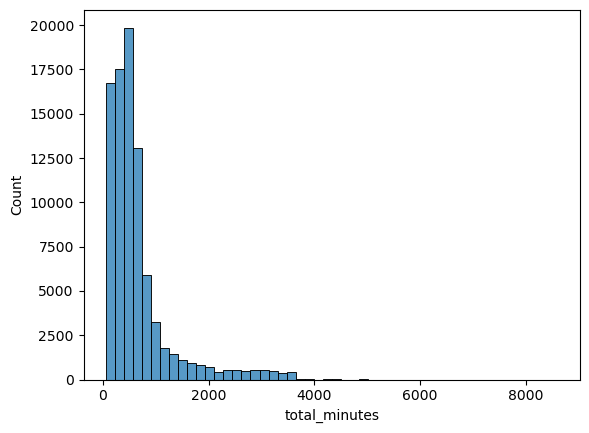

In [94]:
sns.histplot(main_df.total_minutes, bins = 50)

<Axes: xlabel='releasedate', ylabel='Count'>

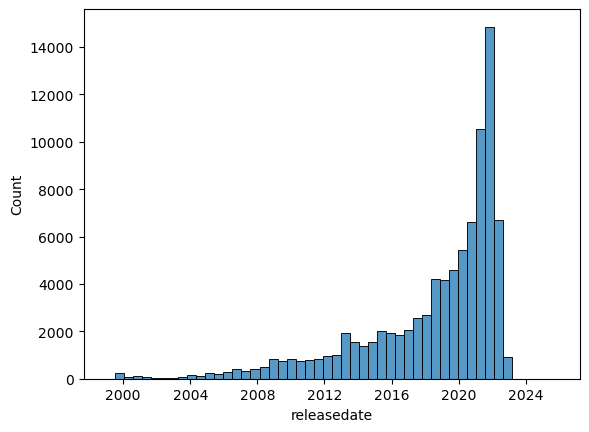

In [100]:
sns.histplot(main_df.releasedate, bins = 50)

<Axes: xlabel='rating', ylabel='Count'>

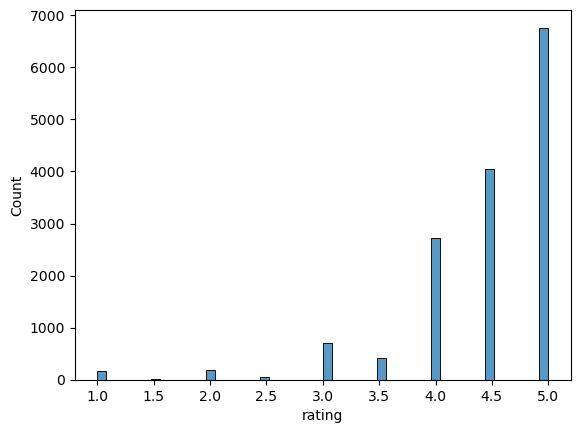

In [96]:
sns.histplot(rating_df.rating)

<Axes: xlabel='usa_prices', ylabel='Count'>

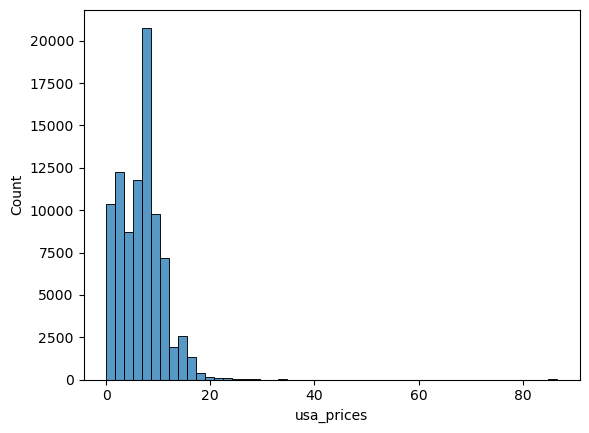

In [97]:
sns.histplot(price_df.usa_prices, bins = 50)